In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

In [2]:
meta = pd.read_csv("meta.csv")
meta.head()

,sample_id,geographic_cohort,geographic_cohort_colour,geographic_cohort_shape,PCA_cohort,PCA_cohort_colour,mitochondrial_id,karyotype_3La,karyotype_3Ra,karyotype_3Rb,...,n_het_2R,n_called_2R,n_het_2L,n_called_2L,n_het_3L_no_inv,n_called_3L_no_inv,n_het_3R_no_inv,n_called_3R_no_inv,n_het_2R_no_inv,n_called_2R_no_inv
0,VBS24195,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,645885,46919562,538040,36796424,173694,13546775,198527,17691045,508501,35625018
1,VBS24196,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,651148,46917025,379214,36804494,129652,13546512,219283,17689422,515734,35621205
2,VBS24197,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,640992,46920647,528886,36788937,159380,13547270,190204,17689654,497306,35625730
3,VBS24198,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,668032,46904102,524003,36788738,154959,13547378,215783,17687489,519551,35616296
4,VBS24199,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,588985,46923098,504157,36795961,169478,13548605,247618,17686009,462626,35630056


In [3]:
ordered_cohorts = [
 'Ghana_Northern-Region', 'Benin_Atlantique-Dept', 'Ghana_Ashanti-Region', 'Nigeria_Ogun-State', 'Cameroon_Adamawa', 
   'CAR_Ombella-MPoko',  'DRC_Haut-Uele', 'Uganda_Eastern-Region', 
 'Kenya_Western-Prov', 'Kenya_Nyanza-Prov', 'Gabon_Haut-Ogooue', 'DRC_Kinshasa',
 'Tanzania_Morogoro-Region', 'Mozambique_Cabo-Delgado', 'Zambia_Eastern-Prov',
 'Malawi_Southern-Region', 'Mozambique_Maputo']

In [4]:
cohort_abbreviations_dict = dict({'Ghana_Northern-Region':'GH-N', 'Benin_Atlantique-Dept':'BJ', 'Ghana_Ashanti-Region':'GH-A', 
                   'Nigeria_Ogun-State':'NG', 'Cameroon_Adamawa':'CM', 'CAR_Ombella-MPoko':'CF',
                   'DRC_Haut-Uele':'CD-H', 'Uganda_Eastern-Region':'UG', 'Kenya_Western-Prov':"KE-W", 
                   'Kenya_Nyanza-Prov':"KE-N", 'Gabon_Haut-Ogooue':"GA", 'DRC_Kinshasa':"CD-K",
                   'Tanzania_Morogoro-Region':"TZ", 'Mozambique_Cabo-Delgado':"MZ-C", 
                   'Zambia_Eastern-Prov':"ZM", 'Malawi_Southern-Region':"MW", 'Mozambique_Maputo':"MZ-M"})

In [5]:
meta['total_hets'] = meta.n_het_2L+meta.n_het_2R+meta.n_het_3L+meta.n_het_3R+meta.n_het_X
meta['total_called'] = meta.n_called_2L+meta.n_called_2R+meta.n_called_3L+meta.n_called_3R+meta.n_called_X

In [6]:
meta['total_hets_no_inv'] = meta.n_het_2L+meta.n_het_2R_no_inv+meta.n_het_3L_no_inv+meta.n_het_3R_no_inv+meta.n_het_X
meta['total_called_no_inv'] = meta.n_called_2L+meta.n_called_2R_no_inv+meta.n_called_3L_no_inv+meta.n_called_3R_no_inv+meta.n_called_X

In [7]:
cat_type = CategoricalDtype(categories=ordered_cohorts, ordered=True)
meta['geographic_cohort'] = meta.geographic_cohort.astype(cat_type)
meta.geographic_cohort

0        Ghana_Northern-Region
1        Ghana_Northern-Region
2        Ghana_Northern-Region
3        Ghana_Northern-Region
4        Ghana_Northern-Region
                ...           
651    Mozambique_Cabo-Delgado
652    Mozambique_Cabo-Delgado
653    Mozambique_Cabo-Delgado
654    Mozambique_Cabo-Delgado
655    Mozambique_Cabo-Delgado
Name: geographic_cohort, Length: 656, dtype: category
Categories (17, object): ['Ghana_Northern-Region' < 'Benin_Atlantique-Dept' < 'Ghana_Ashanti-Region' < 'Nigeria_Ogun-State' ... 'Mozambique_Cabo-Delgado' < 'Zambia_Eastern-Prov' < 'Malawi_Southern-Region' < 'Mozambique_Maputo']

In [8]:
meta.sort_values(by=['geographic_cohort', 'total_hets'], inplace=True)
meta

,sample_id,geographic_cohort,geographic_cohort_colour,geographic_cohort_shape,PCA_cohort,PCA_cohort_colour,mitochondrial_id,karyotype_3La,karyotype_3Ra,karyotype_3Rb,...,n_het_3L_no_inv,n_called_3L_no_inv,n_het_3R_no_inv,n_called_3R_no_inv,n_het_2R_no_inv,n_called_2R_no_inv,total_hets,total_called,total_hets_no_inv,total_called_no_inv
7,VBS24202,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,176990,13541762,110693,17698354,186640,35651034,1389108,161203113,1068731,116908792
18,VBS24225,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,118680,13522396,169771,17654624,465507,35577629,1639609,160942101,1122371,116707242
20,VBS24227,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,165327,13530425,218460,17674327,202018,35636395,1890784,161060697,1302547,116811008
30,VBS24238,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,141176,13525915,224171,17669995,437752,35603245,2029470,161013789,1476172,116766266
1,VBS24196,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,129652,13546512,219283,17689422,515734,35621205,2035712,161154185,1412438,116871258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,VBS24104,Mozambique_Maputo,#17becf,circle,S_southeast,#17becf,funestus-lineageII,3L+/+,3R+/+,3Rb/b,...,233436,13548541,276729,17693013,589398,35634309,2743648,161155419,1924395,116911526
198,VBS17380,Mozambique_Maputo,#17becf,circle,S_southeast,#17becf,funestus-lineageII,3L+/a,3R+/+,3R+/b,...,230495,13542402,256796,17686274,568591,35622473,2764022,161082932,1818442,116872803
490,VBS24098,Mozambique_Maputo,#17becf,circle,S_southeast,#17becf,funestus-lineageII,3L+/+,3R+/+,3R+/+,...,247207,13545074,285512,17690918,605578,35629049,2832805,161117759,1973463,116901446
491,VBS24101,Mozambique_Maputo,#17becf,circle,S_southeast,#17becf,funestus-lineageII,3L+/+,3R+/+,3R+/+,...,256474,13546822,291639,17690098,634719,35632696,2899167,161126515,2044476,116908944


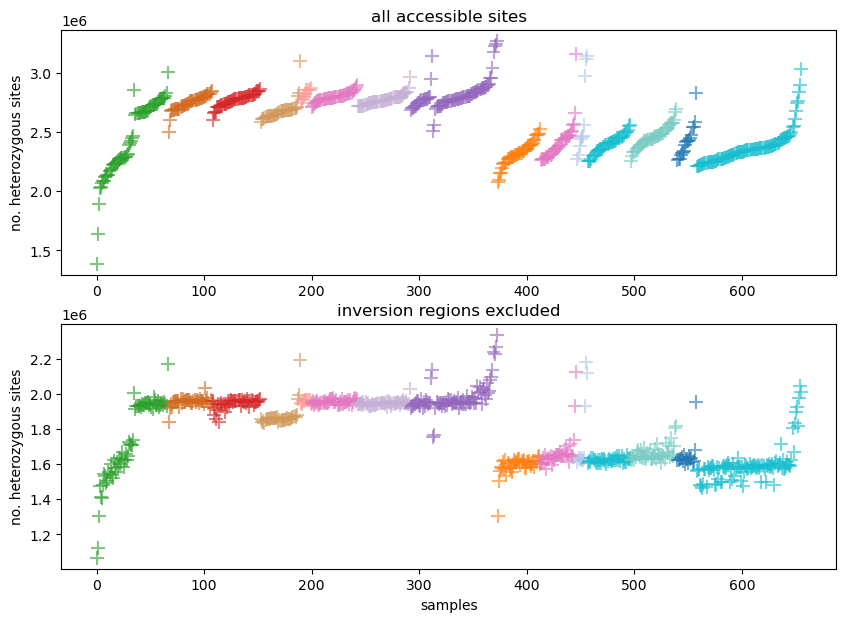

In [9]:
fig, ax = plt.subplots(2,1, figsize=(10,7))
ax[0].scatter(np.arange(656), meta.total_hets, c=meta.geographic_cohort_colour, alpha=.6, marker='+', s=100)
ax[0].set_ylabel('no. heterozygous sites')
ax[0].set_title('all accessible sites')
ax[1].scatter(np.arange(656), meta.total_hets_no_inv, c=meta.geographic_cohort_colour, alpha=.6, marker='+', s=100)
ax[1].set_ylabel('no. heterozygous sites')
ax[1].set_title('inversion regions excluded')
ax[1].set_xlabel('samples')
plt.savefig("n_variants_inc_no_inv.png")

In [11]:
meta.sort_values(by=['geographic_cohort', 'total_hets_no_inv'], inplace=True)
meta

,sample_id,geographic_cohort,geographic_cohort_colour,geographic_cohort_shape,PCA_cohort,PCA_cohort_colour,mitochondrial_id,karyotype_3La,karyotype_3Ra,karyotype_3Rb,...,n_het_3L_no_inv,n_called_3L_no_inv,n_het_3R_no_inv,n_called_3R_no_inv,n_het_2R_no_inv,n_called_2R_no_inv,total_hets,total_called,total_hets_no_inv,total_called_no_inv
7,VBS24202,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,176990,13541762,110693,17698354,186640,35651034,1389108,161203113,1068731,116908792
18,VBS24225,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,118680,13522396,169771,17654624,465507,35577629,1639609,160942101,1122371,116707242
20,VBS24227,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,165327,13530425,218460,17674327,202018,35636395,1890784,161060697,1302547,116811008
9,VBS24204,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,149160,13539383,146852,17688093,481799,35625016,2069945,161128341,1406111,116854498
1,VBS24196,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,129652,13546512,219283,17689422,515734,35621205,2035712,161154185,1412438,116871258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,VBS24095,Mozambique_Maputo,#17becf,circle,S_southeast,#17becf,funestus-lineageII,3La/a,3R+/+,3Rb/b,...,239460,13546104,272530,17689918,583955,35636414,2674567,161189895,1895182,116908148
492,VBS24104,Mozambique_Maputo,#17becf,circle,S_southeast,#17becf,funestus-lineageII,3L+/+,3R+/+,3Rb/b,...,233436,13548541,276729,17693013,589398,35634309,2743648,161155419,1924395,116911526
490,VBS24098,Mozambique_Maputo,#17becf,circle,S_southeast,#17becf,funestus-lineageII,3L+/+,3R+/+,3R+/+,...,247207,13545074,285512,17690918,605578,35629049,2832805,161117759,1973463,116901446
489,VBS24097,Mozambique_Maputo,#17becf,circle,S_southeast,#17becf,funestus-lineageII,3L+/a,3R+/+,3R+/b,...,256350,13546024,291488,17687790,619428,35630437,3028335,161124119,2008886,116898632


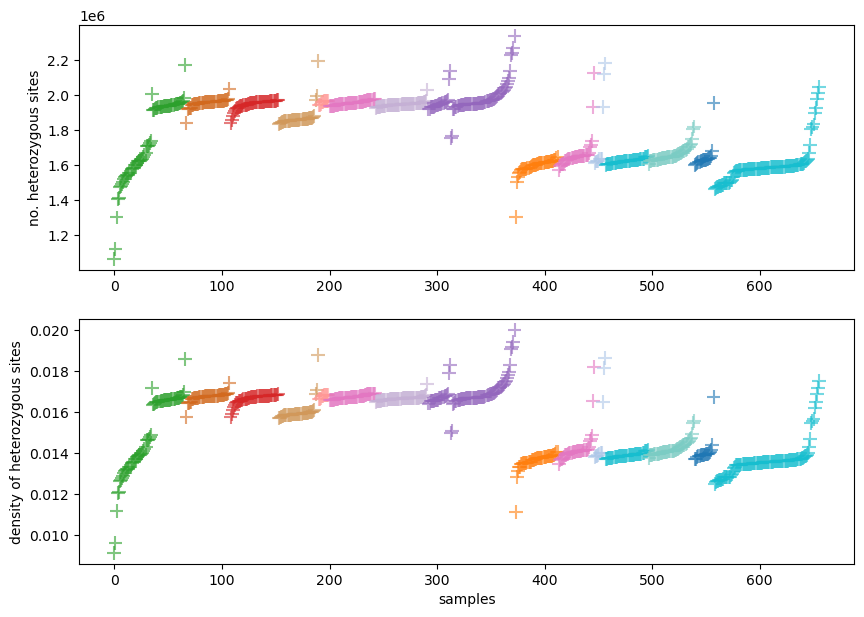

In [8]:
fig, ax = plt.subplots(2,1, figsize=(10,7))
ax[0].scatter(np.arange(656), meta.total_hets_no_inv, c=meta.geographic_cohort_colour, alpha=.6, marker='+', s=100)
ax[0].set_ylabel('no. heterozygous sites')
ax[1].scatter(np.arange(656), meta.total_hets_no_inv/meta.total_called_no_inv, c=meta.geographic_cohort_colour, alpha=.6, marker='+', s=100)
ax[1].set_ylabel('density of heterozygous sites')
ax[1].set_xlabel('samples')
plt.savefig("n_variants_no_inv.png")

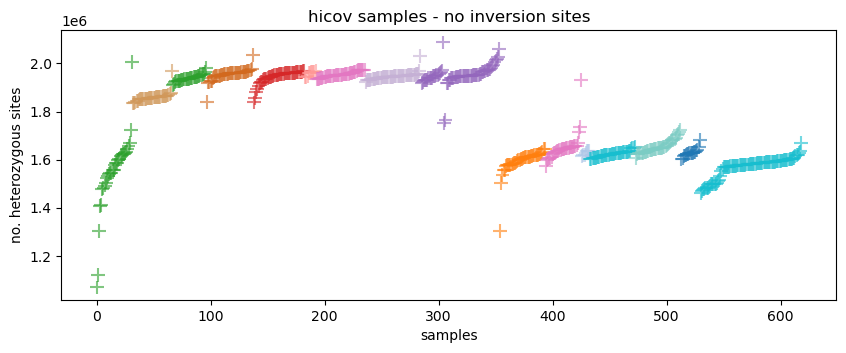

In [15]:
metasub = meta.loc[~meta.sample_id.isin(low_cov_samples)]
fig, ax = plt.subplots(1,1, figsize=(10,3.5))
ax.scatter(np.arange(metasub.shape[0]), metasub.total_hets_no_inv, c=metasub.geographic_cohort_colour, alpha=.6, marker='+', s=100)
ax.set_ylabel('no. heterozygous sites')
ax.set_title('hicov samples - no inversion sites')
ax.set_xlabel('samples')
plt.savefig("n_variants_excl_lowcov_excl_inv.png")

In [26]:
metasub = meta.loc[~meta.sample_id.isin(low_cov_samples)]
#metasub.sort_values(['geographic_cohort', 'total_hets_no_inv'], inplace=True)
metasub.shape

(619, 32)

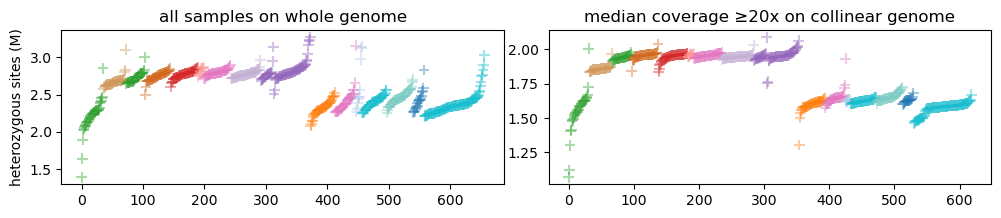

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,2), gridspec_kw=({'wspace':0.1}))
ax[0].scatter(np.arange(meta.shape[0]), meta.total_hets/1000000, c=meta.geographic_cohort_colour, alpha=.4, marker='+', s=60)
ax[0].set_ylabel('heterozygous sites (M)')
ax[0].set_title('all samples on whole genome')
ax[1].scatter(np.arange(metasub.shape[0]), metasub.total_hets_no_inv/1000000, c=metasub.geographic_cohort_colour, alpha=.4, marker='+', s=60)
ax[1].set_title('median coverage ≥20x on collinear genome')

plt.savefig("EDF_gendiv.svg")

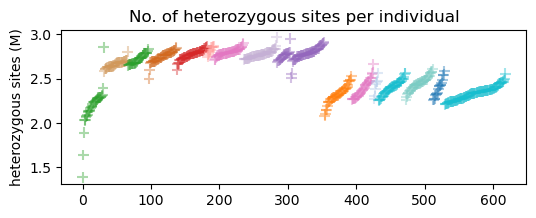

In [54]:
fig, ax = plt.subplots(1,1, figsize=(6,2))
ax.scatter(np.arange(metasub.shape[0]), metasub.total_hets/1000000, c=metasub.geographic_cohort_colour, alpha=.4, marker='+', s=60)
ax.set_ylabel('heterozygous sites (M)')
ax.set_title('No. of heterozygous sites per individual')
#ax.hlines(np.repeat(1.5,8), [0,32,67,183,193,354,426,530], [32,67,183,193,354,426,530,619], color=[
    #'#2ca02c', '#d1985a', '#d62728', '#ff9896', '#9467bd', '#ff7f0e', '#1f77b4', '#17becf'])

plt.savefig("main1.png")

In [50]:
metasub.groupby(['PCA_cohort']).size()

PCA_cohort
EQ_Benin        35
EQ_CAR          10
EQ_central     116
EQ_east        161
N_Ghana         31
S_central       72
S_east         104
S_southeast     89
dtype: int64

In [51]:
metasub[['PCA_cohort', 'PCA_cohort_colour']].drop_duplicates()

,PCA_cohort,PCA_cohort_colour
7,N_Ghana,#2ca02c
10,NaN,NaN
254,EQ_Benin,#d1985a
160,EQ_central,#d62728
82,EQ_CAR,#ff9896
601,EQ_east,#9467bd
46,S_central,#ff7f0e
566,S_east,#1f77b4
502,S_southeast,#17becf


In [42]:
sizesbound = np.insert(metasub.groupby('geographic_cohort').size().values, 0, 0)
labelpos = np.cumsum(sizebound[:-1])+sizebound[1:]/2

In [43]:
sizebound

array([ 0, 32, 35, 30, 41, 45, 10, 43, 49, 20, 49, 40, 32,  7, 40, 40, 17,
       89])

In [33]:
np.insert(np.arange(12), 0, -1)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

/tmp/ipykernel_2634/548283518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metasub.sort_values(by=['geographic_cohort', f'n_het_{arm}'], inplace=True)
/tmp/ipykernel_2634/548283518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metasub.sort_values(by=['geographic_cohort', f'n_het_{arm}'], inplace=True)
/tmp/ipykernel_2634/548283518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metasub.sort_values(by=['geographic_cohor

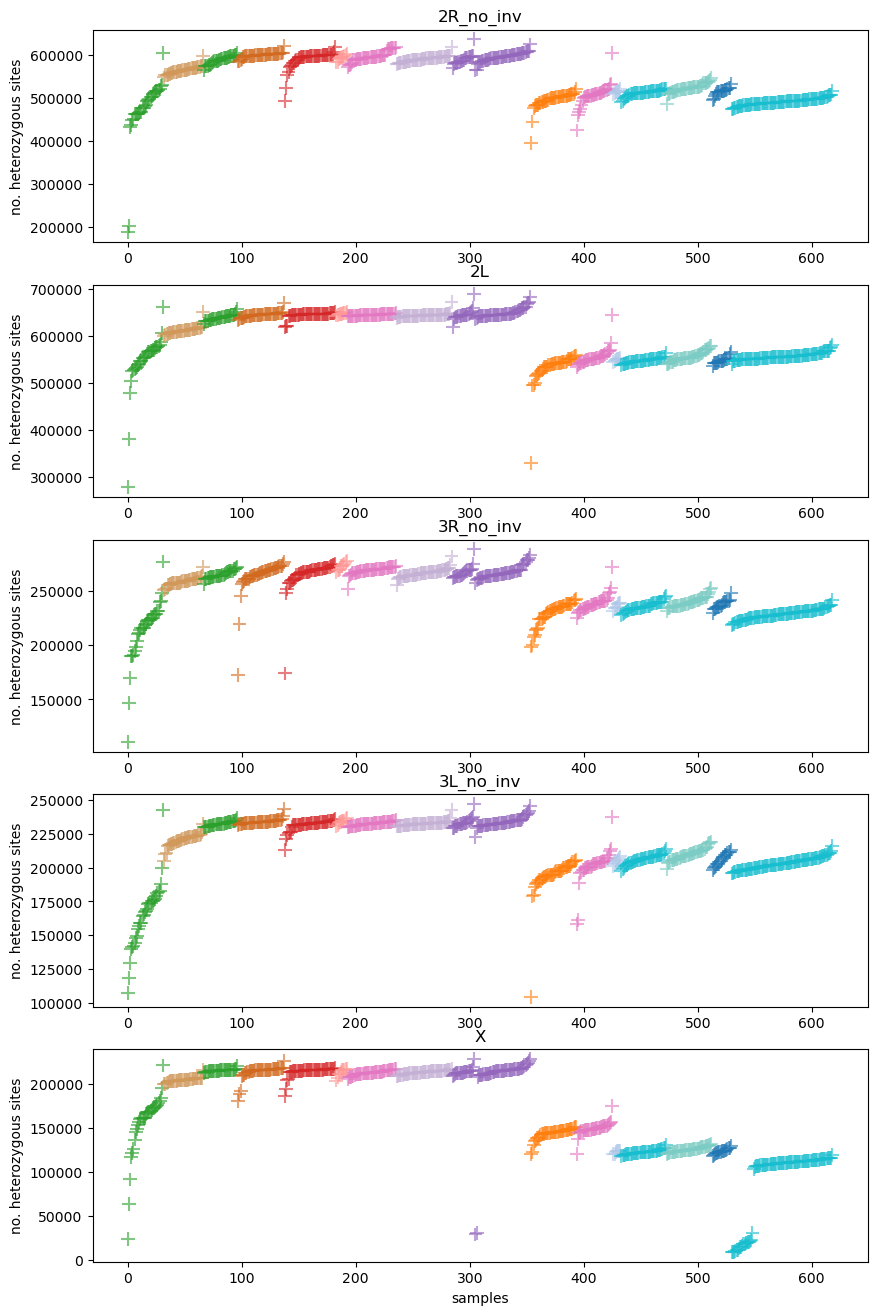

In [29]:
fig, ax = plt.subplots(5,1, figsize=(10,16))
for i, arm in enumerate(['2R_no_inv','2L','3R_no_inv','3L_no_inv','X']):
    metasub.sort_values(by=['geographic_cohort', f'n_het_{arm}'], inplace=True)
    ax[i].scatter(np.arange(metasub.shape[0]), metasub[f'n_het_{arm}'], c=metasub.geographic_cohort_colour, alpha=.6, marker='+', s=100)
    ax[i].set_ylabel('no. heterozygous sites')
    ax[i].set_title(f'{arm}')
ax[4].set_xlabel('samples')
plt.savefig("n_variants_excl_lowcov_excl_inv_per_arm.png")

### Exclude low coverage samples

In [9]:
samplesets = ['1229-VO-GH-DADZIE-VMF00095', '1230-VO-GA-CF-AYALA-VMF00045', '1231-VO-MULTI-WONDJI-VMF00043', 
              '1232-VO-KE-OCHOMO-VMF00044', '1235-VO-MZ-PAAIJMANS-VMF00094', '1236-VO-TZ-OKUMU-VMF00090', 
              '1240-VO-CD-KOEKEMOER-VMF00099', '1240-VO-MZ-KOEKEMOER-VMF00101']

In [10]:
qc_summary = pd.read_csv(f"../../../tracking/{samplesets[0]}/wgs_sequence_qc/qc_summary.tsv", sep='\t', index_col=0)
for sampleset in samplesets[1:]:
    qc_sampleset = pd.read_csv(f"../../../tracking/{sampleset}/wgs_sequence_qc/qc_summary.tsv", sep='\t', index_col=0)
    qc_summary = pd.concat([qc_summary, qc_sampleset])

In [11]:
qc_summary

,mean_cov,median_cov,modal_cov,mean_cov_2RL,median_cov_2RL,mode_cov_2RL,mean_cov_3RL,median_cov_3RL,mode_cov_3RL,mean_cov_X,median_cov_X,mode_cov_X,frac_gen_cov,divergence,pc_contam,LLR
derived_sample_id,,,,,,,,,,,,,,,,
VBS24195,36.43,36,38,36.52,36,38,35.92,35,38,38.01,36,37,0.934,0.01949,0.532,515.207
VBS24196,31.26,30,27,31.38,30,27,30.98,29,27,31.81,30,27,0.932,0.01933,0.722,712.024
VBS24197,37.04,36,36,37.36,37,36,37.34,37,36,34.31,34,35,0.934,0.01948,0.821,1104.059
VBS24198,22.53,21,20,22.41,21,20,22.55,21,20,23.02,21,19,0.927,0.01966,0.967,860.620
VBS24199,34.68,34,33,34.69,34,33,34.36,33,33,35.84,34,33,0.932,0.01937,0.602,578.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VBS24534,45.66,45,45,46.08,45,45,45.81,45,45,43.08,43,45,0.943,0.01819,0.629,630.525
VBS24535,48.51,50,55,49.14,51,55,47.98,50,55,47.56,49,55,0.942,0.01818,0.750,898.943
VBS24536,43.27,43,43,43.51,43,43,43.26,43,43,42.21,42,43,0.946,0.01780,0.703,659.971


In [13]:
qc_summary['sex_auto_ratio'] = qc_summary.median_cov_X/qc_summary.median_cov_3RL

In [18]:
qc_summary.loc[(qc_summary.sex_auto_ratio>=.8) & (qc_summary.sex_auto_ratio<=1.2), 'sex'] = 'F'
qc_summary.loc[(qc_summary.sex_auto_ratio>=.4) & (qc_summary.sex_auto_ratio<=.61), 'sex'] = 'M'
sexdict = dict(qc_summary.sex)
meta['sex'] = meta.sample_id.map(sexdict)
meta.groupby(['sex', 'geographic_cohort'], dropna=False).size()

sex  geographic_cohort       
F    Ghana_Northern-Region       36
     Benin_Atlantique-Dept       37
     Ghana_Ashanti-Region        31
     Nigeria_Ogun-State          41
     Cameroon_Adamawa            45
     CAR_Ombella-MPoko           10
     DRC_Haut-Uele               43
     Uganda_Eastern-Region       49
     Kenya_Western-Prov          21
     Kenya_Nyanza-Prov           58
     Gabon_Haut-Ogooue           40
     DRC_Kinshasa                34
     Tanzania_Morogoro-Region    10
     Mozambique_Cabo-Delgado     40
     Zambia_Eastern-Prov         43
     Malawi_Southern-Region      18
     Mozambique_Maputo           79
M    Ghana_Northern-Region        0
     Benin_Atlantique-Dept        0
     Ghana_Ashanti-Region         0
     Nigeria_Ogun-State           0
     Cameroon_Adamawa             0
     CAR_Ombella-MPoko            0
     DRC_Haut-Uele                0
     Uganda_Eastern-Region        0
     Kenya_Western-Prov           0
     Kenya_Nyanza-Prov            

In [19]:
meta.loc[~meta.sample_id.isin(low_cov_samples)].groupby(['sex', 'geographic_cohort'], dropna=False).size()

sex  geographic_cohort       
F    Ghana_Northern-Region       32
     Benin_Atlantique-Dept       35
     Ghana_Ashanti-Region        30
     Nigeria_Ogun-State          41
     Cameroon_Adamawa            45
     CAR_Ombella-MPoko           10
     DRC_Haut-Uele               43
     Uganda_Eastern-Region       49
     Kenya_Western-Prov          20
     Kenya_Nyanza-Prov           47
     Gabon_Haut-Ogooue           40
     DRC_Kinshasa                32
     Tanzania_Morogoro-Region     7
     Mozambique_Cabo-Delgado     40
     Zambia_Eastern-Prov         40
     Malawi_Southern-Region      17
     Mozambique_Maputo           70
M    Ghana_Northern-Region        0
     Benin_Atlantique-Dept        0
     Ghana_Ashanti-Region         0
     Nigeria_Ogun-State           0
     Cameroon_Adamawa             0
     CAR_Ombella-MPoko            0
     DRC_Haut-Uele                0
     Uganda_Eastern-Region        0
     Kenya_Western-Prov           0
     Kenya_Nyanza-Prov            

In [26]:
meta.loc[(~meta.sample_id.isin(low_cov_samples)) & (meta.geographic_cohort=='Mozambique_Maputo') & 
         (meta.sex=='M'), 'total_hets'].mean()

2290104.1052631577

In [27]:
meta.loc[(~meta.sample_id.isin(low_cov_samples)) & (meta.geographic_cohort=='Mozambique_Maputo') & 
         (meta.sex=='F'), 'total_hets'].mean()

2345101.0714285714

In [12]:
low_cov_samples = qc_summary.loc[qc_summary.median_cov<20].index
low_cov_samples

Index(['VBS24206', 'VBS24208', 'VBS24210', 'VBS24221', 'VBS24222', 'VBS24229',
       'VBS17783', 'VBS17201', 'VBS17223', 'VBS17232',
       ...
       'VBS24022', 'VBS24042', 'VBS24050', 'VBS24056', 'VBS24058', 'VBS24062',
       'VBS24067', 'VBS24495', 'VBS24500', 'VBS24501'],
      dtype='object', name='derived_sample_id', length=169)

In [25]:
cont4_samples = qc_summary.loc[qc_summary.pc_contam>=3].index
cont4_samples

Index(['VBS17783', 'VBS17194', 'VBS17211', 'VBS17223', 'VBS17232', 'VBS17254',
       'VBS17260', 'VBS17262', 'VBS17263', 'VBS17264', 'VBS17268', 'VBS17274',
       'VBS17276', 'VBS17281', 'VBS17283', 'VBS17284', 'VBS17287', 'VBS17290',
       'VBS17293', 'VBS17297', 'VBS17298', 'VBS17307', 'VBS17311', 'VBS17325',
       'VBS17335', 'VBS17338', 'VBS17350', 'VBS17351', 'VBS17379', 'VBS17380',
       'VBS17383', 'VBS17386', 'VBS17429', 'VBS17431', 'VBS17444', 'VBS17445',
       'VBS17446', 'VBS17447', 'VBS17448', 'VBS17449', 'VBS17450', 'VBS17463',
       'VBS17464', 'VBS17487', 'VBS17498', 'VBS17504', 'VBS17510', 'VBS17518',
       'VBS17521', 'VBS17525', 'VBS17533', 'VBS17539', 'VBS17542', 'VBS17548',
       'VBS17569', 'VBS17584', 'VBS17587', 'VBS17588', 'VBS17589', 'VBS17590',
       'VBS17591', 'VBS17593', 'VBS17595', 'VBS17596', 'VBS17611', 'VBS17612',
       'VBS17617', 'VBS17621', 'VBS17622', 'VBS17626', 'VBS17631', 'VBS17632',
       'VBS17639', 'VBS17640', 'VBS17643', 'VBS17644

In [11]:
meta_sub = meta.loc[(~meta.sample_id.isin(low_cov_samples))]
meta.shape[0] - meta_sub.shape[0]

37

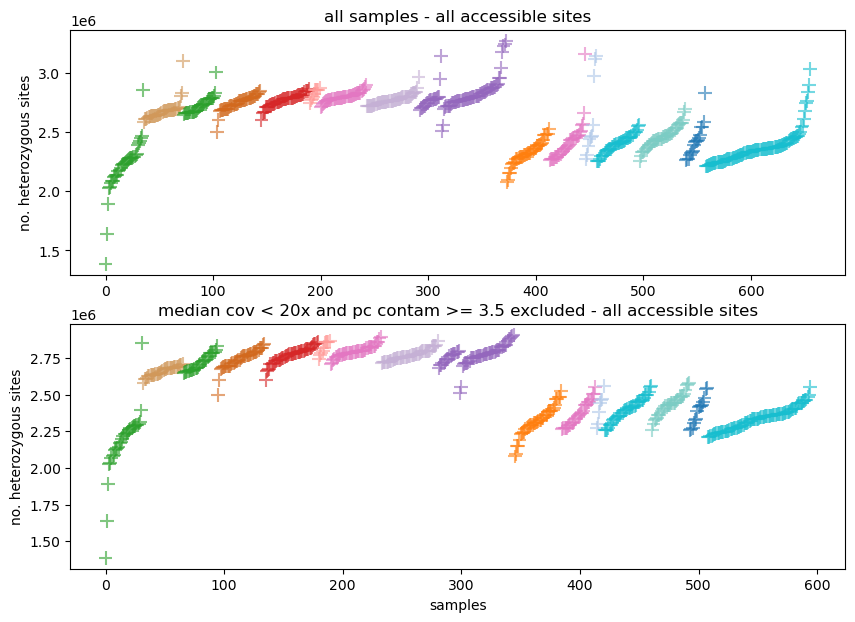

In [27]:
fig, ax = plt.subplots(2,1, figsize=(10,7))
ax[0].scatter(np.arange(meta.shape[0]), meta.total_hets, c=meta.geographic_cohort_colour, alpha=.6, marker='+', s=100)
ax[0].set_ylabel('no. heterozygous sites')
ax[0].set_title('all samples - all accessible sites')
ax[1].scatter(np.arange(meta_sub.shape[0]), meta_sub.total_hets, c=meta_sub.geographic_cohort_colour, alpha=.6, marker='+', s=100)
ax[1].set_ylabel('no. heterozygous sites')
ax[1].set_title('median cov < 20x and pc contam >= 3.5 excluded - all accessible sites')
ax[1].set_xlabel('samples')
plt.savefig("n_variants_excl_lowcov_cont3.png")

### Add coverage column to meta

In [2]:
meta = pd.read_csv('../../../meta/additional_sample_metadata.csv')
meta.head()

,sample_id,geographic_cohort,geographic_cohort_colour,geographic_cohort_shape,PCA_cohort,PCA_cohort_colour,mitochondrial_id,karyotype_3La,karyotype_3Ra,karyotype_3Rb,karyotype_2Ra,karyotype_2Rh
0,VBS24195,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,NaN,NaN
1,VBS24196,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,NaN,NaN
2,VBS24197,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,NaN,NaN
3,VBS24198,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,NaN,NaN
4,VBS24199,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,NaN,NaN


In [8]:
cov_dict = dict(qc_summary.median_cov)

In [9]:
meta['median_coverage'] = meta.sample_id.map(cov_dict)
meta.groupby('median_coverage', dropna=False).size()

median_coverage
10     2
11     3
12     4
13     9
14     2
      ..
94     1
96     1
104    1
108    1
110    1
Length: 63, dtype: int64

In [10]:
meta.to_csv('../../../meta/additional_sample_metadata.csv', index=False)

In [15]:
meta_sub.sort_values('total_hets')

,sample_id,geographic_cohort,geographic_cohort_colour,geographic_cohort_shape,PCA_cohort,PCA_cohort_colour,mitochondrial_id,karyotype_3La,karyotype_3Ra,karyotype_3Rb,...,n_het_2L,n_called_2L,n_het_3L_no_inv,n_called_3L_no_inv,n_het_3R_no_inv,n_called_3R_no_inv,n_het_2R_no_inv,n_called_2R_no_inv,total_hets,total_called
7,VBS24202,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,570211,36785696,176990,13541762,110693,17698354,186640,35651034,1389108,161203113
18,VBS24225,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,277038,36747805,118680,13522396,169771,17654624,465507,35577629,1639609,160942101
20,VBS24227,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,567896,36762495,165327,13530425,218460,17674327,202018,35636395,1890784,161060697
30,VBS24238,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,546647,36760600,141176,13525915,224171,17669995,437752,35603245,2029470,161013789
1,VBS24196,Ghana_Northern-Region,#2ca02c,triangle-up,N_Ghana,#2ca02c,funestus-lineageI-clusterB,NaN,NaN,NaN,...,379214,36804494,129652,13546512,219283,17689422,515734,35621205,2035712,161154185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,VBS24391,DRC_Haut-Uele,#e377c2,triangle-up,EQ_east,#9467bd,funestus-lineageI-clusterB,3L+/a,3R+/a,3R+/b,...,643645,36789575,231337,13546025,268655,17687369,616271,35612912,2895465,161084113
436,VBS17668,Kenya_Nyanza-Prov,#9467bd,circle,EQ_east,#9467bd,funestus-lineageI-clusterB,3L+/a,3R+/+,3R+/b,...,661439,36775389,239717,13539691,273953,17683105,609538,35609165,2897291,161042298
440,VBS17674,Kenya_Nyanza-Prov,#9467bd,circle,EQ_east,#9467bd,funestus-lineageI-clusterB,3L+/+,3R+/a,3R+/b,...,669024,36775170,237337,13540311,279808,17682034,607454,35609682,2907092,161039140
444,VBS17679,Kenya_Western-Prov,#9467bd,triangle-up,EQ_east,#9467bd,funestus-lineageI-clusterB,3La/a,3R+/a,3Rb/b,...,688155,36766105,247017,13538314,288026,17677412,636614,35598671,2947687,161027595
